<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 3

Group Partners: Brian Janger, Matthew Wang, Caleb Watson

### Problem 0 (3 points)

## Part 1: Gradient Descent with Analytic Line Search 

### Problem 1.1 (Exam Style)

### Problem 1.2

In [1]:
import numpy as np
from scipy import optimize

def line_search(f, g, z0): 
    x = optimize.golden(func=f, brack=(0., 1.e-3), full_output=True)
    alpha = x[0]
    phi_alp = x[1]
    z1 = z0 - alpha*g(z0)
    f1 = f(z1)
    return (z1, f1, x[2])

# defining functions and starting point from previous part
def f(x): return np.sin(x[0]**2*x[1]**2 - 1)
def g(x): return np.array([2*x[0]*x[1]**2*np.cos(x[0]**2*x[1]**2-1), 2*x[1]*x[0]**2*np.cos(x[0]**2*x[1]**2-1)])
def phi(x): return f(z0 - x*g(z0))

z0 = [1,1]
return_val = line_search(phi, g, z0)
with np.printoptions(precision=3, suppress=True):
    print("f({}) = {} -> f({}) = {} in {} evaluations".format(z0, f(z0), return_val[0], f(return_val[0]), return_val[2]))
                                             

f([1, 1]) = 0.0 -> f([0. 0.]) = -0.8414709848078965 in 46 evaluations


### Problem 1.3 (Exam Style)

We are finding the first instance in which $\phi(\alpha)$ is equal to zero, unlike in the numerical approach in which the entire function space is considered when deciding the positions of $a, b,$ and $c$ in the bracketing triple. Escentially, the two approaches differ in their goal of finding a local versus global minimum.  

### Problem 1.4 (Exam Style)

In order for $z_1$ to be a local minimum for $f(z)$, the gradient at $z_1$ must be equal to 0. As we can see below, this is the case making $z_1$ a local minimum for $f(z)$. 

In [2]:
with np.printoptions(precision=3, suppress=True):
    print(g(return_val[0]))

[0. 0.]


### Problem 1.5 (Exam Style)

In [3]:
# review calculus for 1.1 to return global minimum

### Problem 1.6 (Exam Style)

## Part 2: Gradient Descent

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
def paraboloid(z, axes):
    z2 = z * z
    p = axes[0] * z2[0] + axes[1] * z2[1]
    return p

In [6]:
def g_paraboloid(z, axes):
    g = 2 * z * axes
    return g

In [7]:
def make_bowl_functions(axes):
    def f(z):
        return paraboloid(z, axes)

    def g(z):
        return g_paraboloid(z, axes)

    return f, g

In [8]:
bowl, g_bowl = make_bowl_functions((0.1, 1.))

In [9]:
def show_function(p, x_range=(-1.2, 1.2), y_range=(-1.2, 1.2), n=101, levels=10):
    x = np.linspace(x_range[0], x_range[1], n)
    y = np.linspace(y_range[0], y_range[1], n)
    xx, yy = np.meshgrid(x, y)
    zz = np.stack((xx, yy), axis=0)
    pp = p(zz)
    plt.contour(x, y, pp, levels=levels)
    plt.plot(0., 0., '.', ms=8)
    plt.axis('square')
    plt.xticks([])
    plt.yticks([])

In [10]:
def draw_circle(center=(0., 0.), radius=1., samples=300, color='r'):
    omega = np.linspace(0., 2. * np.pi, samples)
    x, y = np.cos(omega), np.sin(omega)
    x = radius * x + center[0]
    y = radius * y + center[1]
    plt.plot(x, y, color=color)

### Problem 2.1

In [91]:
# function to implement different styles of gradient descent
def gradient_descent(
    f, g, z0,
    alpha=0.,
    momentum=0.,
    max_iterations=1000,
    min_gradient=1.e-6,
    min_step=1.e-8,
    stop_radius=0.01,
    record=False
):
    def phi(x): return f(z0 - x*z0)
    iterations = 1 # var to track the number of iterations
    evaluations = 0
    
    point_list = [(z0, f(z0))] # list of points and function values encountered during descent
    if alpha <= 0: # perform line search
        x = line_search(phi, g, z0) # returns (z1, f1, ne)
        zk, fk, ne = x
        evaluations += ne
        if np.linalg.norm(zk) >= stop_radius: 
            point_list.append((zk, f(zk)))
        while(np.linalg.norm(zk-z0) >= min_step 
              and np.linalg.norm(g(zk)) >= min_gradient
              and iterations <= max_iterations):
            x = line_search(phi, g, zk) # returns (z1, f1, ne)
            z0 = zk        # old = z0
            zk, fk, ne = x # new = zk
            evaluations += ne
            iterations += 1
            if np.linalg.norm(zk) >= stop_radius: 
                point_list.append((zk, f(zk)))
                continue
            else: break   
                
    else:         # uses descent rate, alpha
        evaluations += 1
        v0=0
        if(momentum > 0):
            v1 = momentum*v0 - alpha*g(z0)
            v0 = v1
            zk = z0 + v1 
        else: zk = z0 - alpha*g(z0)
        if np.linalg.norm(zk) >= stop_radius: 
            point_list.append((zk, f(zk)))
        while(np.linalg.norm(zk-z0) >= min_step 
              and np.linalg.norm(g(zk)) >= min_gradient
              and evaluations <= max_iterations):
            evaluations += 1
            if(momentum > 0):
                v1 = momentum*v0 - alpha*g(z0)
                v0 = v1
                zk = z0 + v1
            else:
                zk = z0 - alpha*g(z0)
            if np.linalg.norm(zk) >= stop_radius: 
                point_list.append((zk, f(zk)))
                continue
            else: break
                
    if record is False: # return (zk, f(zk), total number of function evalutions)
        return(zk, f(np.array(zk)), evaluations)
        
    else: # return (zk, f(zk), total number of function evalutions, 
          # list of points and function values encountered during descent)
        return(zk, f(np.array(zk)), evaluations, point_list)

In [58]:
# show the paths traversed by gradient_descent on bowl using line search
def show_paths(alpha=0., momentum=0.):
    k = 1
    plt.suptitle('Gradient descent of rate %d with momentum %d' % (alpha, momentum))
    for x in range(0, 108, 18): 
        z = np.array([np.cos(x * (np.pi / 180)), np.sin(x * (np.pi / 180))])
        path = gradient_descent(bowl, g_bowl, z, alpha=alpha, momentum=momentum, record=True)[3]
        plt.subplot(2,3,k)
        plt.title('Angle $\omega$ = %d' % x)
        path_x = [x[0][0] for x in path]
        path_y = [x[0][1] for x in path]
        plt.plot(path_x, path_y, '-r')
        plt.plot(z[0], z[1], 'x', ms=12)
        k+=1
        show_function(bowl)
        draw_circle()

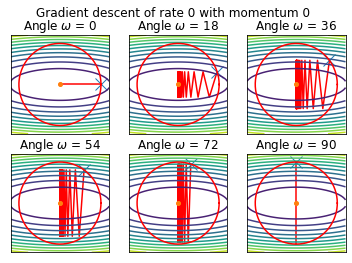

In [59]:
show_paths()

In [60]:
# Explanation for Problem 2.1

### Problem 2.2

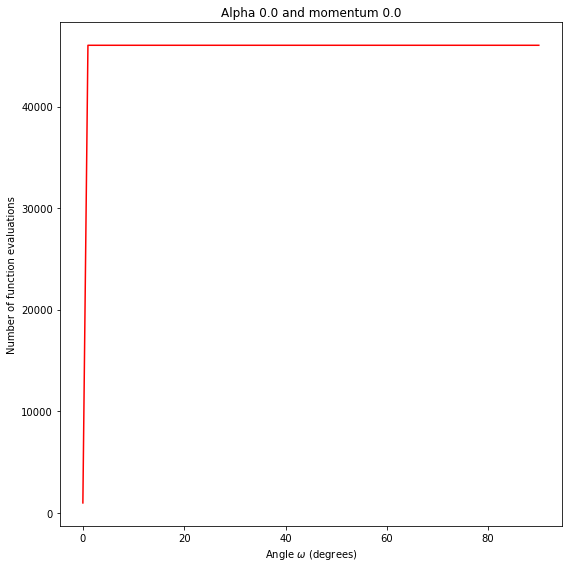

In [85]:
def show_evaluations(alpha=0., momentum=0.):
    eval_arr = []
    for x in range(0, 91):
        z = np.array([np.cos(x * (np.pi / 180)), np.sin(x * (np.pi / 180))])
        evaluations = gradient_descent(bowl, g_bowl, z, alpha=alpha, momentum=momentum, record=True)[2]    
        eval_arr.append((x, evaluations))
    eval_x = [x[0] for x in eval_arr]
    eval_y = [x[1] for x in eval_arr]
    plt.plot(eval_x, eval_y, '-r')
    plt.title('Alpha {} and momentum {}'.format(alpha, momentum))
    plt.xlabel('Angle $\omega$ (degrees)')
    plt.ylabel('Number of function evaluations')
    
plt.figure(figsize=(8, 8), tight_layout=True)
show_evaluations()
plt.show()

### Problem 2.3

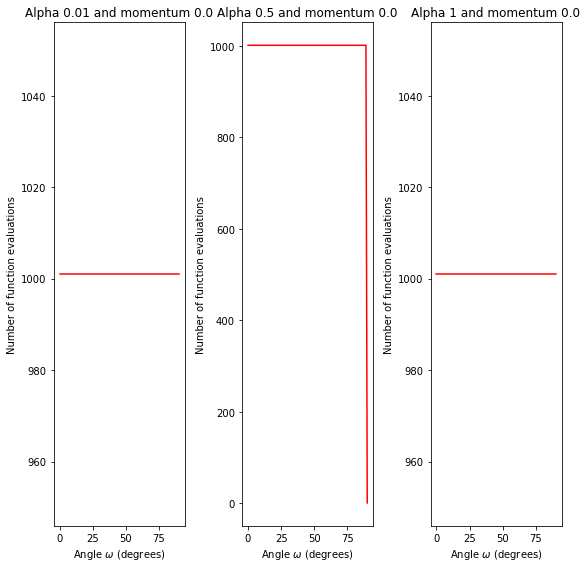

In [86]:
plt.figure(figsize=(8, 8), tight_layout=True)
i = 1
for x in [0.01, 0.5, 1]:
    plt.subplot(1, 3, i)
    show_evaluations(alpha=x)
    i+=1
plt.show()

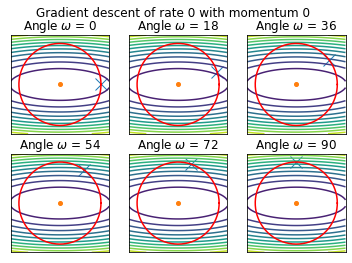

In [87]:
show_paths(alpha=0.01)

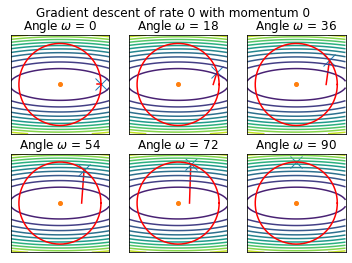

In [88]:
show_paths(alpha=0.5)

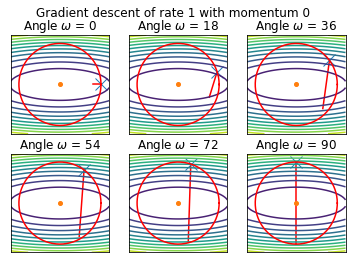

In [89]:
show_paths(alpha=1)

### Problem 2.4

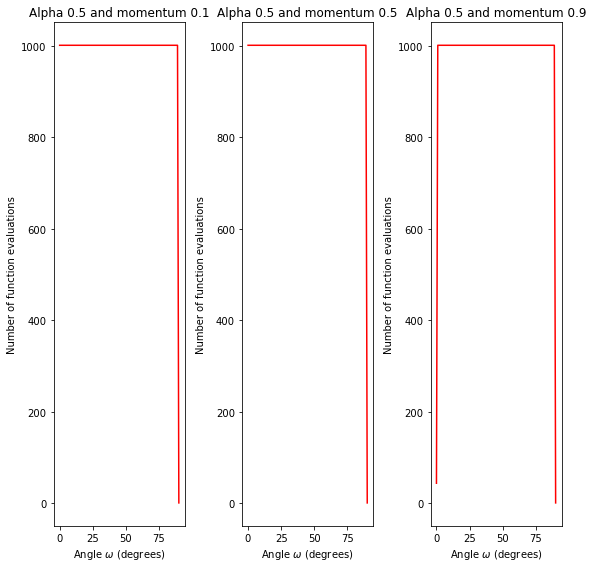

In [92]:
plt.figure(figsize=(8, 8), tight_layout=True)
i = 1
for x in [0.1, 0.5, 0.9]:
    plt.subplot(1, 3, i)
    show_evaluations(alpha=0.5, momentum=x)
    i+=1
plt.show()

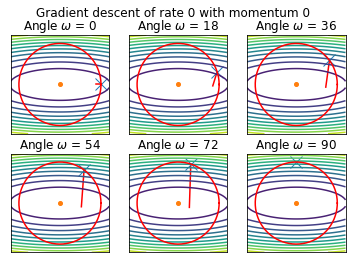

In [94]:
show_paths(alpha=0.5, momentum=0.1)

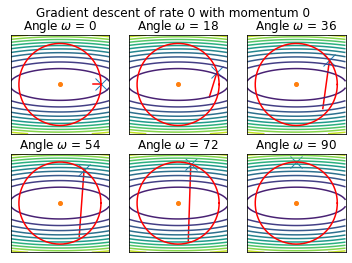

In [95]:
show_paths(alpha=0.5, momentum=0.5)

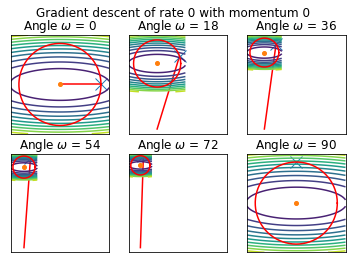

In [96]:
show_paths(alpha=0.5, momentum=0.9)